In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 取り込む時点で条件を指定することが出来る。

In [11]:
df = pd.read_csv(
                u'./data1.csv',
    parse_dates={'date_hour':["日時"]},
    index_col = "date_hour",
    na_values="x"
                )

In [12]:
df

,時,気圧(hPa)現地,気圧(hPa)海面,降水量(mm),気温(℃),湿度(％),風向・風速(m/s)風速,風向・風速(m/s)風向,日照時間(h)
date_hour,,,,,,,,,
2013-11-28 01:00:00,1,1012.1,1013.8,--,11.9,48,7.0,西,NaN
2013-11-28 02:00:00,2,1012.2,1013.9,--,11.5,50,7.4,西,NaN
2013-11-28 03:00:00,3,1012.3,1014.0,--,10.9,47,6.8,西,NaN
2013-11-28 04:00:00,4,1012.6,1014.3,--,10.3,44,6.9,西,NaN
2013-11-28 05:00:00,5,1012.7,1014.4,--,10.0,46,6.1,西,NaN
...,...,...,...,...,...,...,...,...,...
2012-07-06 20:00:00,20,1000.7,1002.3,1.0,27.6,78,4.0,西,0.0
2012-07-06 21:00:00,21,999.7,1001.3,10.0,23.9,82,7.8,西南西,NaN
2012-07-06 22:00:00,22,998.8,1000.4,1.5,23.6,87,3.0,西南西,NaN


In [13]:
del df['時']

In [15]:
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "湿度(％)": "humid",
}
df.rename(columns=columns, inplace=True)

In [17]:
df = df.fillna(0)

In [18]:
# ヒストグラム生成
delta = df.index - pd.to_datetime('2012/07/01 00:00:00')
df['time'] = delta.days + delta.seconds / 3600.0 / 24.0

In [19]:
df

,気圧(hPa)現地,気圧(hPa)海面,rain,temperature,humid,風向・風速(m/s)風速,風向・風速(m/s)風向,日照時間(h),time
date_hour,,,,,,,,,
2013-11-28 01:00:00,1012.1,1013.8,--,11.9,48,7.0,西,0,515.041667
2013-11-28 02:00:00,1012.2,1013.9,--,11.5,50,7.4,西,0,515.083333
2013-11-28 03:00:00,1012.3,1014.0,--,10.9,47,6.8,西,0,515.125000
2013-11-28 04:00:00,1012.6,1014.3,--,10.3,44,6.9,西,0,515.166667
2013-11-28 05:00:00,1012.7,1014.4,--,10.0,46,6.1,西,0,515.208333
...,...,...,...,...,...,...,...,...,...
2012-07-06 20:00:00,1000.7,1002.3,1.0,27.6,78,4.0,西,0.0,5.833333
2012-07-06 21:00:00,999.7,1001.3,10.0,23.9,82,7.8,西南西,0,5.875000
2012-07-06 22:00:00,998.8,1000.4,1.5,23.6,87,3.0,西南西,0,5.916667


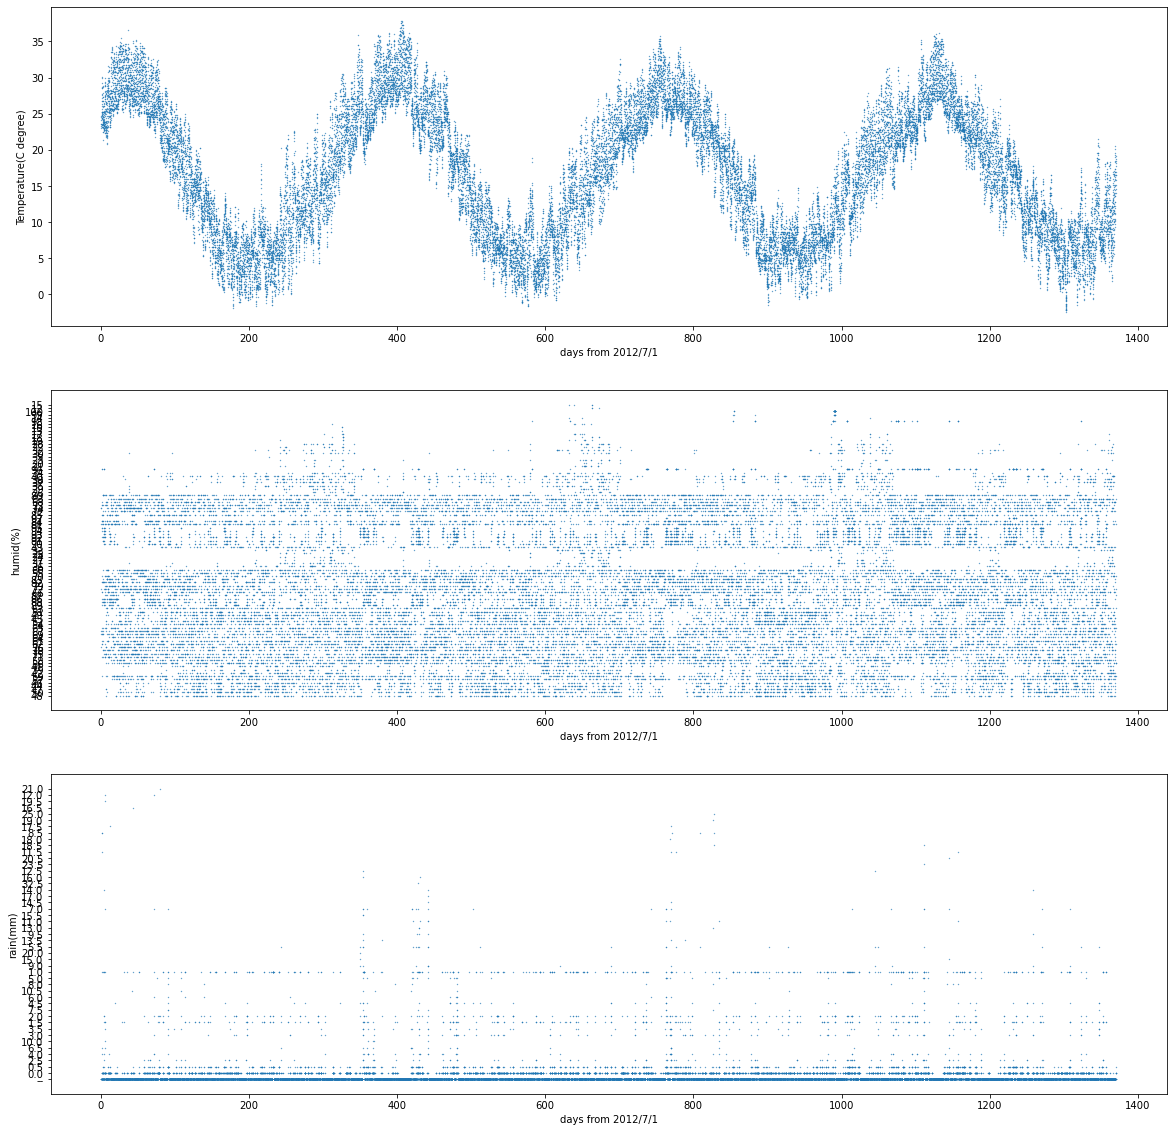

In [20]:
# 画像サイズを設定する
plt.figure(figsize=(20, 20))

# 表示
plt.subplot(3, 1, 1)
plt.scatter(df['time'], df['temperature'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')

plt.subplot(3, 1, 2)
plt.scatter(df['time'], df['humid'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('humid(%)')

plt.subplot(3, 1, 3)
plt.scatter(df['time'], df['rain'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('rain(mm)')


# グラフ表示
plt.show()

In [21]:
df2 = pd.read_csv(
    'data2.csv',
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col = "date_hour")

In [24]:
df2

,consumption,time
date_hour,,
2012-07-02 00:00:00,261,1.000000
2012-07-02 01:00:00,256,1.041667
2012-07-02 02:00:00,269,1.083333
2012-07-02 03:00:00,289,1.125000
2012-07-02 04:00:00,297,1.166667
...,...,...
2012-12-31 19:00:00,375,183.791667
2012-12-31 20:00:00,364,183.833333
2012-12-31 21:00:00,350,183.875000


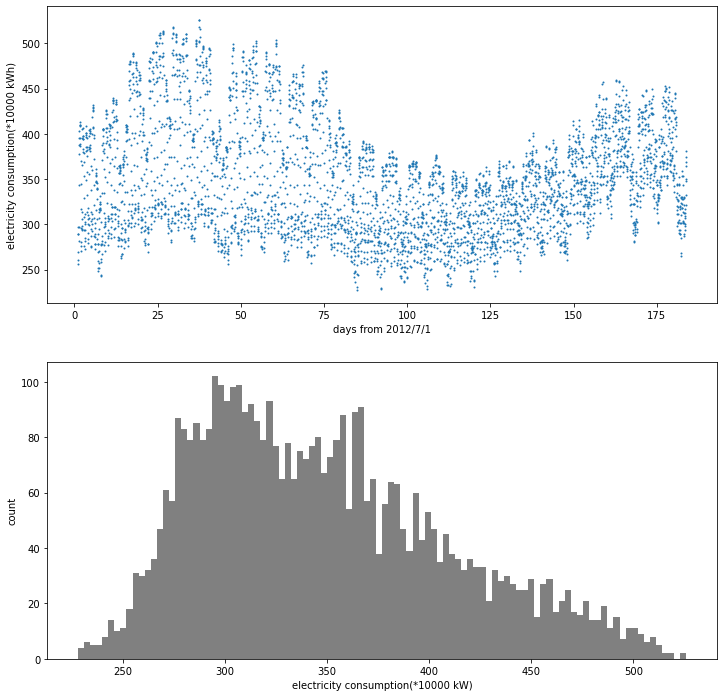

In [23]:
# 画像のサイズを設定する
plt.figure(figsize=(12, 12))

# 時系列グラフ生成
delta = df2.index - pd.to_datetime('2012/07/01 00:00:00')
df2['time'] = delta.days + delta.seconds / 3600.0 / 24.0

#電力消費量の時間変化
plt.subplot(2, 1, 1)
plt.scatter(df2['time'], df2['consumption'], s=1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('electricity consumption(*10000 kWh)')

# ヒストグラム生成
plt.subplot(2, 1, 2)
plt.hist(df2['consumption'], bins=100, color="gray")
plt.xlabel('electricity consumption(*10000 kW)')
plt.ylabel(u'count')

# グラフ
plt.show()